# CNV manhattan plot

In [1]:
import subprocess
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
# from pprint import pprint
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

In [2]:
os.chdir("/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/20221209_WGS/analysis")

In [12]:
name_list = [
    'Npm2a-1k-2N_20221209',
    'Npm2a-1k-2N_20221216',
    'Npm2a-1k-4N_20221209',
    'Npm2a-1k-4N_20221216',
    'Npm2a-256-2N_20221209',
    'Npm2a-256-2N_20221216',
    'Npm2a-256-4N_20221209',
    'Npm2a-256-4N_20221216',
    'Npm2a-4-5h-1-2N_20221216',
    'Npm2a-4-5h-1-4N_20221216',
    'Npm2a-4-5h-2-2N_20221216',
    'Npm2a-4-5h-2-4N_20221216',
    'Npm2a-4-5h-2N_20221209',
    'Npm2a-4-5h-4N_20221209',
    'Npm2a-5-5h-1-2N_20221209',
    'Npm2a-5-5h-1-4N_20221209',
    'Npm2a-5-5h-2-2N_20221209',
    'Npm2a-5-5h-2-4N_20221209',
]

# bin sum coverage

In [8]:
import glob

bed_ls = glob.glob('*.bed')
bed_ls.sort()
bed_ls

['Npm2a-1k-2N.neg_1Mb.bed',
 'Npm2a-1k-2N.pos_1Mb.bed',
 'Npm2a-1k-2N_20221209.intersect_SlideWin.bed',
 'Npm2a-1k-2N_20221216.intersect_SlideWin.bed',
 'Npm2a-1k-4N.neg_1Mb.bed',
 'Npm2a-1k-4N.pos_1Mb.bed',
 'Npm2a-1k-4N_20221209.intersect_SlideWin.bed',
 'Npm2a-1k-4N_20221216.intersect_SlideWin.bed',
 'Npm2a-256-2N.neg_1Mb.bed',
 'Npm2a-256-2N.pos_1Mb.bed',
 'Npm2a-256-2N_20221209.intersect_SlideWin.bed',
 'Npm2a-256-2N_20221216.intersect_SlideWin.bed',
 'Npm2a-256-4N.neg_1Mb.bed',
 'Npm2a-256-4N.pos_1Mb.bed',
 'Npm2a-256-4N_20221209.intersect_SlideWin.bed',
 'Npm2a-256-4N_20221216.intersect_SlideWin.bed',
 'Npm2a-4-5h-1-2N_20221216.intersect_SlideWin.bed',
 'Npm2a-4-5h-1-4N_20221216.intersect_SlideWin.bed',
 'Npm2a-4-5h-2-2N_20221216.intersect_SlideWin.bed',
 'Npm2a-4-5h-2-4N_20221216.intersect_SlideWin.bed',
 'Npm2a-4-5h-2N_20221209.intersect_SlideWin.bed',
 'Npm2a-4-5h-4N_20221209.intersect_SlideWin.bed',
 'Npm2a-4p5-2N.neg_1Mb.bed',
 'Npm2a-4p5-2N.pos_1Mb.bed',
 'Npm2a-4p5-4N.neg

In [19]:
%%bash
### split bed to small bed
split_bed(){
    name=$1
    split -l 100000000 --numeric-suffixes=0 ${name}.intersect_SlideWin.bed split_beds/${name}.intersect_SlideWin.bed.
}

# split_bed Npm2a-1k-2N_20221209
# split_bed Npm2a-1k-2N_20221216
# split_bed Npm2a-1k-4N_20221209
# split_bed Npm2a-1k-4N_20221216
# split_bed Npm2a-256-2N_20221209
# split_bed Npm2a-256-2N_20221216
# split_bed Npm2a-256-4N_20221209
# split_bed Npm2a-256-4N_20221216
# split_bed Npm2a-4-5h-1-2N_20221216
# split_bed Npm2a-4-5h-1-4N_20221216
# split_bed Npm2a-4-5h-2-2N_20221216
# split_bed Npm2a-4-5h-2-4N_20221216
# split_bed Npm2a-4-5h-2N_20221209
# split_bed Npm2a-4-5h-4N_20221209
# split_bed Npm2a-5-5h-1-2N_20221209
# split_bed Npm2a-5-5h-1-4N_20221209
# split_bed Npm2a-5-5h-2-2N_20221209
# split_bed Npm2a-5-5h-2-4N_20221209



In [18]:
### runned outside pynb

os.chdir("/root/maternal_loading/1.private_data/20221209_WGS/analysis/split_beds")

import glob
bed_ls = glob.glob('*.bed.*')

for bed in bed_ls :
    df = pd.read_csv(bed, sep = "\t", header = None, names = ['bin_chr', 'bin_start', 'bin_end', 'bin_name', 'bdg_chr', 'bdg_start', 'bdg_end', 'coverage'])
    df['cov * len'] = df['coverage'] * (df['bdg_end'] - df['bdg_start'])
    df = df[['bin_name', 'cov * len']].groupby('bin_name').sum().reset_index()
    df.to_csv(f'../split_tsvs/{bed.split(".")[0]}.bin_sumCov.tsv.{bed.split(".")[-1]}', header = False, index = False, sep = "\t")
    

In [21]:
%%bash
### cat *.tsv.* together
cd /mnt/Storage/home/wangyiman/maternal_loading/1.private_data/20221209_WGS/analysis/split_tsvs
cat_tsv(){
    name=$1
    cat ${name}.bin_sumCov.tsv.* | sort > ../${name}.bin_sumCov.tsv.tmp
}

cat_tsv Npm2a-1k-2N_20221209
cat_tsv Npm2a-1k-2N_20221216
cat_tsv Npm2a-1k-4N_20221209
cat_tsv Npm2a-1k-4N_20221216
cat_tsv Npm2a-256-2N_20221209
cat_tsv Npm2a-256-2N_20221216
cat_tsv Npm2a-256-4N_20221209
cat_tsv Npm2a-256-4N_20221216
cat_tsv Npm2a-4-5h-1-2N_20221216
cat_tsv Npm2a-4-5h-1-4N_20221216
cat_tsv Npm2a-4-5h-2-2N_20221216
cat_tsv Npm2a-4-5h-2-4N_20221216
cat_tsv Npm2a-4-5h-2N_20221209
cat_tsv Npm2a-4-5h-4N_20221209
cat_tsv Npm2a-5-5h-1-2N_20221209
cat_tsv Npm2a-5-5h-1-4N_20221209
cat_tsv Npm2a-5-5h-2-2N_20221209
cat_tsv Npm2a-5-5h-2-4N_20221209


In [ ]:
os.chdir('/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/20221209_WGS/analysis')
tsv_tmp_ls = glob.glob('*.tsv.tmp')
tsv_tmp_ls.sort()
for tsv_tmp in tsv_tmp_ls[2:] :
    df = pd.read_csv(tsv_tmp, sep = "\t", header = None, names = ['bin_name', 'coverage'])
    df = df.groupby(['bin_name']).sum().reset_index()
    df.to_csv(f'{tsv_tmp.split(".")[0]}.bin_sumCov.tsv', header = False, index = False, sep = "\t")
    
df.head()

In [26]:
tsv_tmp_ls

[]

# bin coverage / expect log

In [4]:
home_dir = '/mnt/Storage/home/wangyiman'

In [5]:
bin_df = pd.read_csv(f'{home_dir}/source/bySpecies/danRer11_2/genome_bin/danRer11_2_main.200kWin.10kStep.bed', header = None, sep = "\t", names = ['chr', 'start', 'end', 'bin_name'])
bin_df

chr     start       end       bin_name
0       chr1         0    200000     bin_chr1_0
1       chr1     10000    210000     bin_chr1_1
2       chr1     20000    220000     bin_chr1_2
3       chr1     30000    230000     bin_chr1_3
4       chr1     40000    240000     bin_chr1_4
...      ...       ...       ...            ...
133687  chr9  56230000  56430000  bin_chr9_5623
133688  chr9  56240000  56440000  bin_chr9_5624
133689  chr9  56250000  56450000  bin_chr9_5625
133690  chr9  56260000  56459846  bin_chr9_5626
133691  chrM         0     16596     bin_chrM_0

[133692 rows x 4 columns]

In [6]:
chrom_size = pd.DataFrame.from_dict({'chr1': 59578282,
 'chr10': 45420867,
 'chr11': 45484837,
 'chr12': 49182954,
 'chr13': 52186027,
 'chr14': 52660232,
 'chr15': 48040578,
 'chr16': 55266484,
 'chr17': 53461100,
 'chr18': 51023478,
 'chr19': 48449771,
 'chr2': 59640629,
 'chr20': 55201332,
 'chr21': 45934066,
 'chr22': 39133080,
 'chr23': 46223584,
 'chr24': 42172926,
 'chr25': 37502051,
 'chr3': 62628489,
 'chr4': 74498832,
 'chr5': 72500376,
 'chr6': 60270059,
 'chr7': 74282399,
 'chr8': 54304671,
 'chr9': 56459846,
 'chrM': 16596}, orient='index')
total_base_num = chrom_size[0].sum()

In [35]:
### expect coverage (genome ave coverage)
import glob
tsv_ls = sorted(glob.glob(f'/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/20221209_WGS/analysis/*.tsv'))
for tsv in tsv_ls :
    df = pd.read_csv(tsv, sep = "\t", header = None, names = ['bin_name', 'coverage'])
    df = pd.merge(bin_df, df, on = 'bin_name')
    bdg = f'{home_dir}/maternal_loading/1.private_data/20221209_WGS/2_signal/{tsv.split("/")[-1].split(".")[0]}.bedGraph'
    df_bdg = pd.read_csv(bdg, sep = "\t", header = None, names = ['chr', 'start', 'end', 'coverage'])
    total_coverage = (df_bdg['coverage'] * (df_bdg['end'] - df_bdg['start'])).sum()
    expect = total_coverage / total_base_num
    df['mean_coverage_ov_expect'] = df['coverage'] / (df['end'] - df['start']) / expect
    df['mean_coverage_ov_expect_log10'] = np.log10(df['mean_coverage_ov_expect'])
    df = df.reset_index()
    df[['chr', 'start', 'end', 'mean_coverage_ov_expect_log10']].to_csv(f'{home_dir}/maternal_loading/1.private_data/20221209_WGS/analysis/{tsv.split("/")[-1].split(".")[0]}.meanCovOverExpect_log10.bedGraph',
                                                                       sep = "\t", header = False, index = False)
    
df    

index   chr     start       end       bin_name  coverage  \
0            0  chr1         0    200000     bin_chr1_0   3955861   
1            1  chr1     10000    210000     bin_chr1_1   4092633   
2            2  chr1     20000    220000     bin_chr1_2   4117912   
3            3  chr1     30000    230000     bin_chr1_3   4080310   
4            4  chr1     40000    240000     bin_chr1_4   4025100   
...        ...   ...       ...       ...            ...       ...   
133687  133687  chr9  56230000  56430000  bin_chr9_5623   4801900   
133688  133688  chr9  56240000  56440000  bin_chr9_5624   4794543   
133689  133689  chr9  56250000  56450000  bin_chr9_5625   4787807   
133690  133690  chr9  56260000  56459846  bin_chr9_5626   4804691   
133691  133691  chrM         0     16596     bin_chrM_0   1065951   

        mean_coverage_ov_expect  mean_coverage_ov_expect_log10  
0                      8.032350                       0.904843  
1                      8.310065                       0.919604  
2                      8.361393                       0.922279  
3                      8.285043                       0.918295  
4                      8.172939                       0.912378  
...                         ...                            ...  
133687                 9.750227                       0.989015  
133688                 9.735288                       0.988349  
133689                 9.721611                       0.987738  
133690                 9.763411                       0.989602  
133691                26.083472                       1.416365  

[133692 rows x 8 columns]

In [51]:
df.sort_values(['chr_num', 'start']).reset_index()

index    chr     start       end  mean_coverage_ov_expect_log10  \
0           0   chr1         0    200000                       0.480197   
1           1   chr1     10000    210000                       0.487262   
2           2   chr1     20000    220000                       0.466695   
3           3   chr1     30000    230000                       0.456426   
4           4   chr1     40000    240000                       0.450995   
...       ...    ...       ...       ...                            ...   
133686  88321  chr25  37270000  37470000                       0.773808   
133687  88322  chr25  37280000  37480000                       0.778776   
133688  88323  chr25  37290000  37490000                       0.774317   
133689  88324  chr25  37300000  37500000                       0.783081   
133690  88325  chr25  37310000  37502051                       0.797628   

        chr_num  
0             1  
1             1  
2             1  
3             1  
4             1  
...         ...  
133686       25  
133687       25  
133688       25  
133689       25  
133690       25  

[133691 rows x 6 columns]

# chromosome level

## manhattan plot

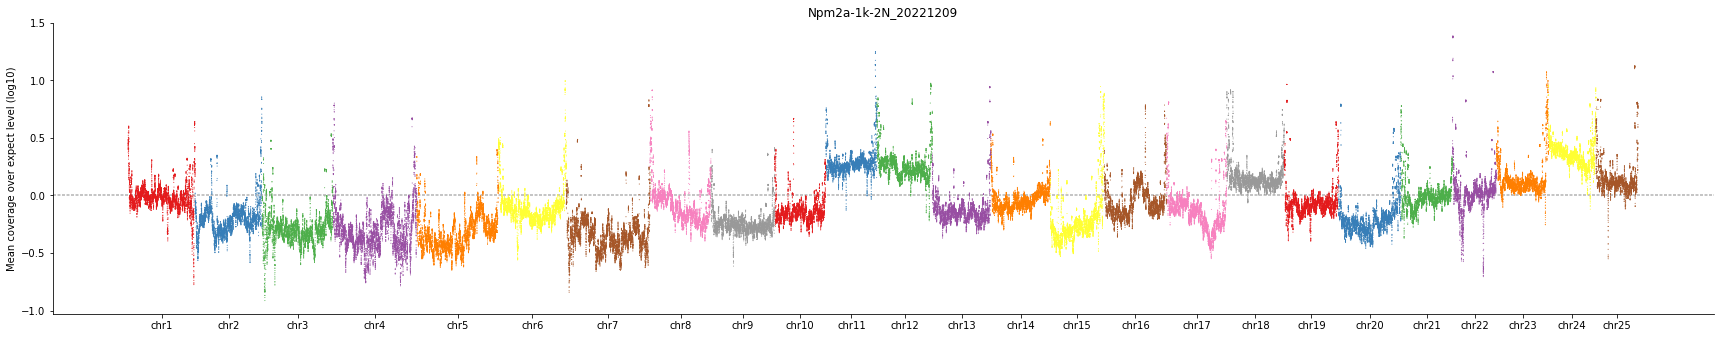

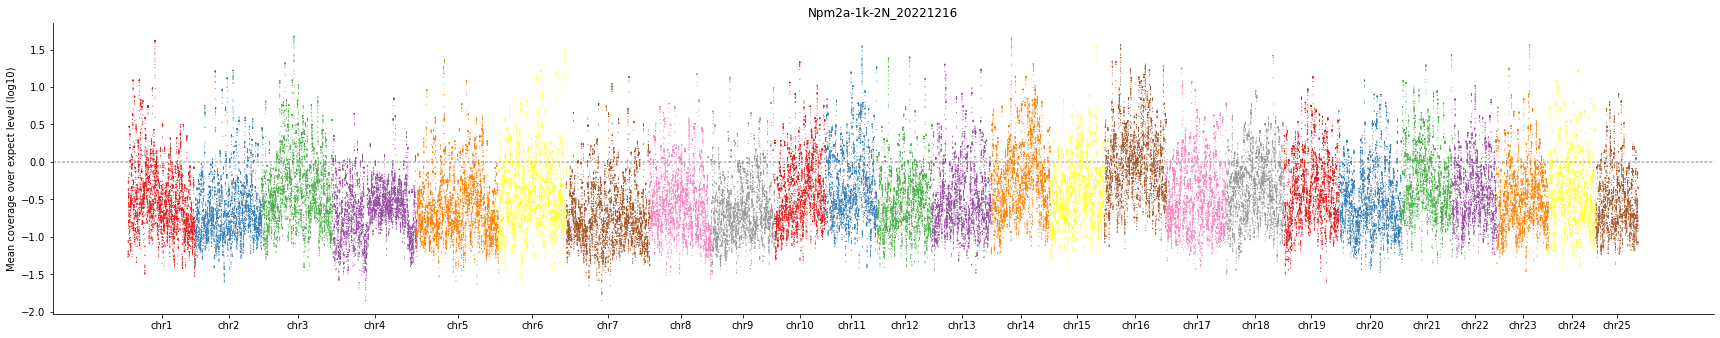

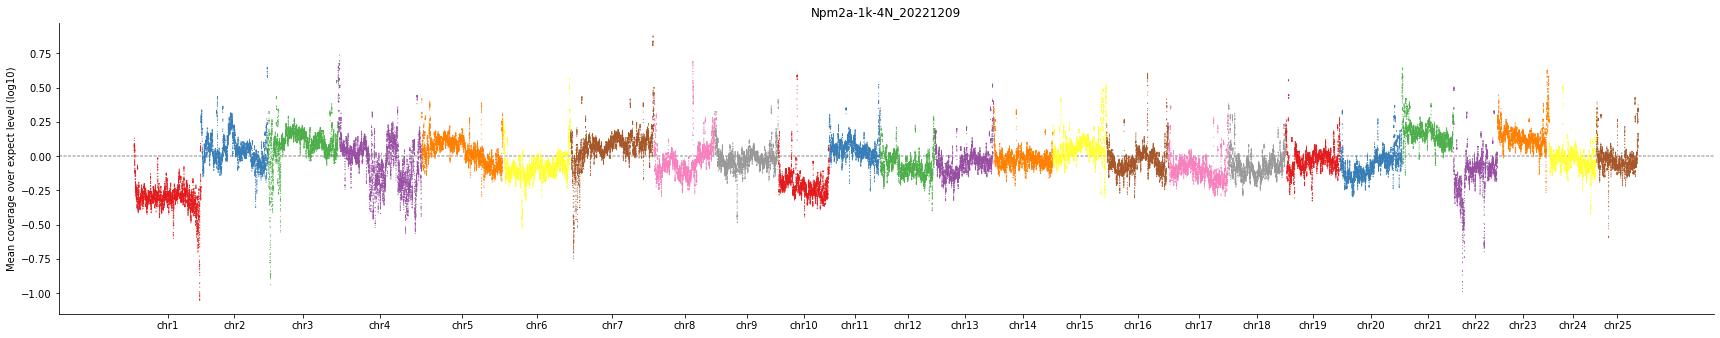

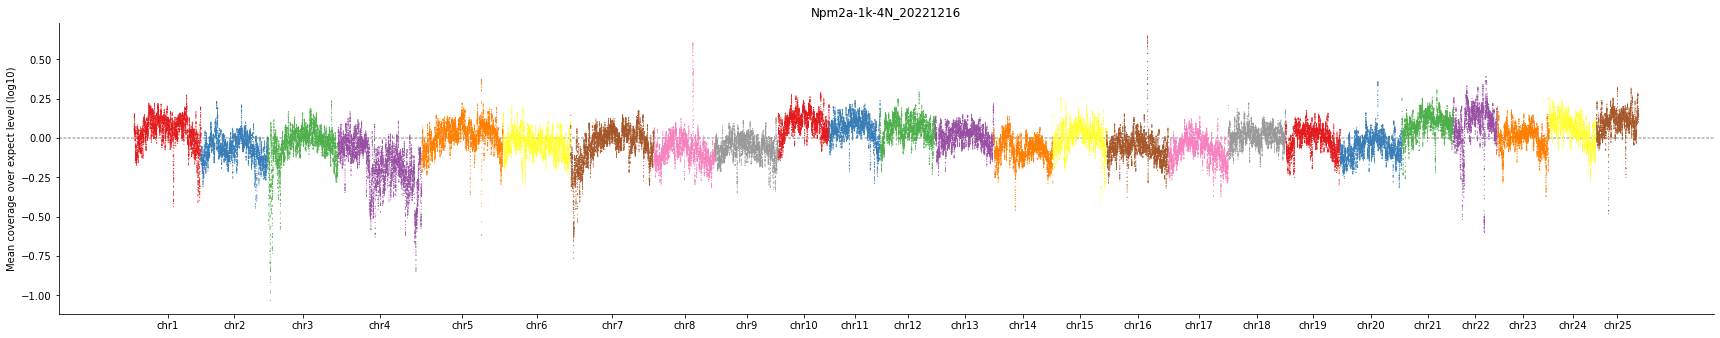

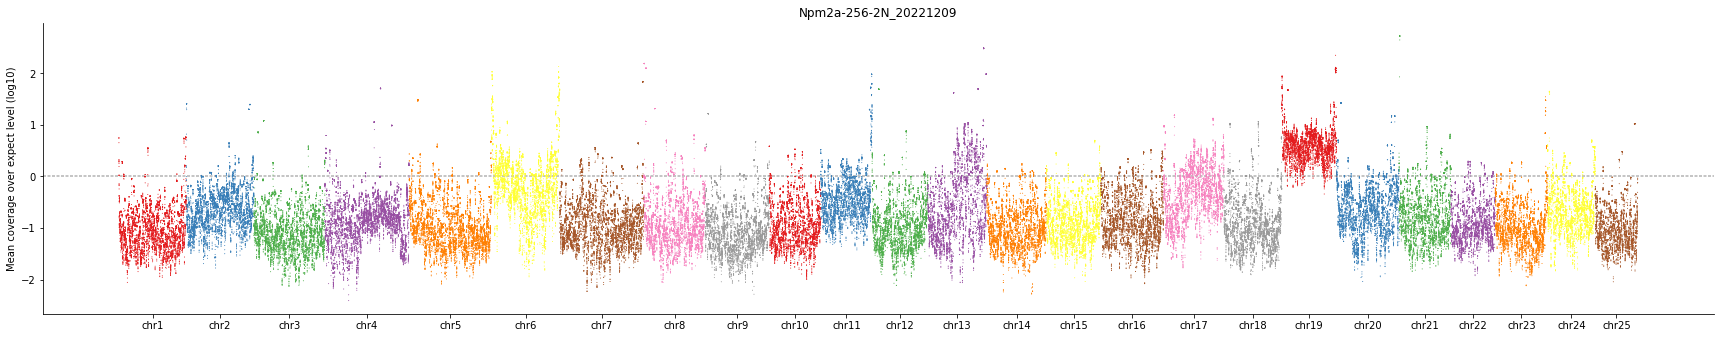

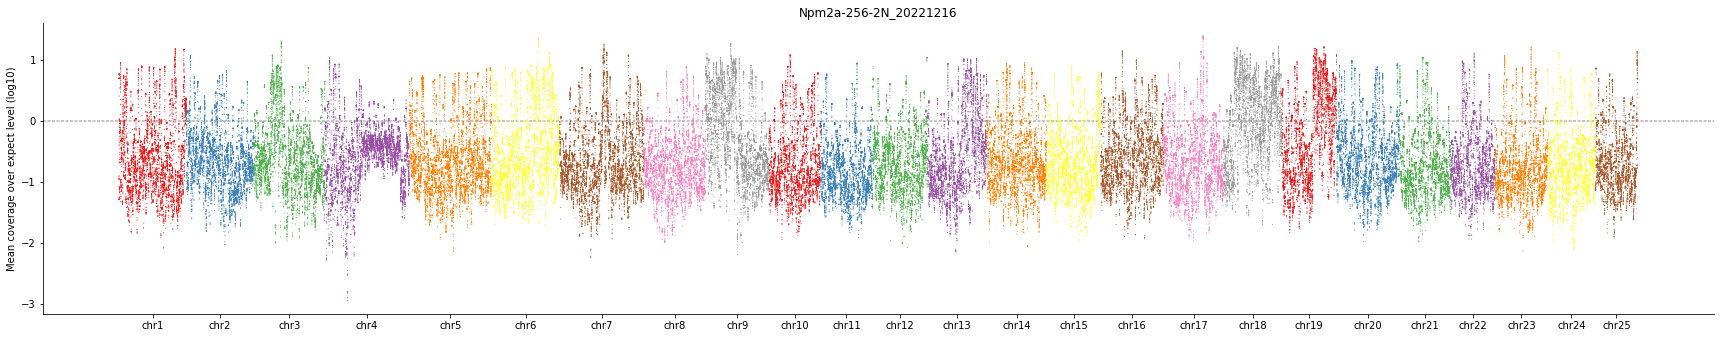

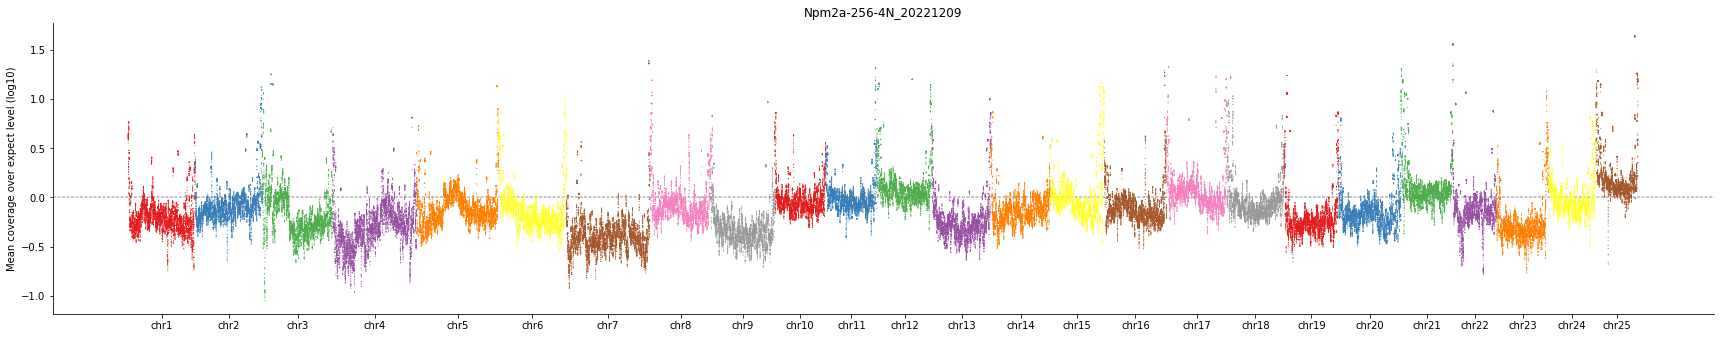

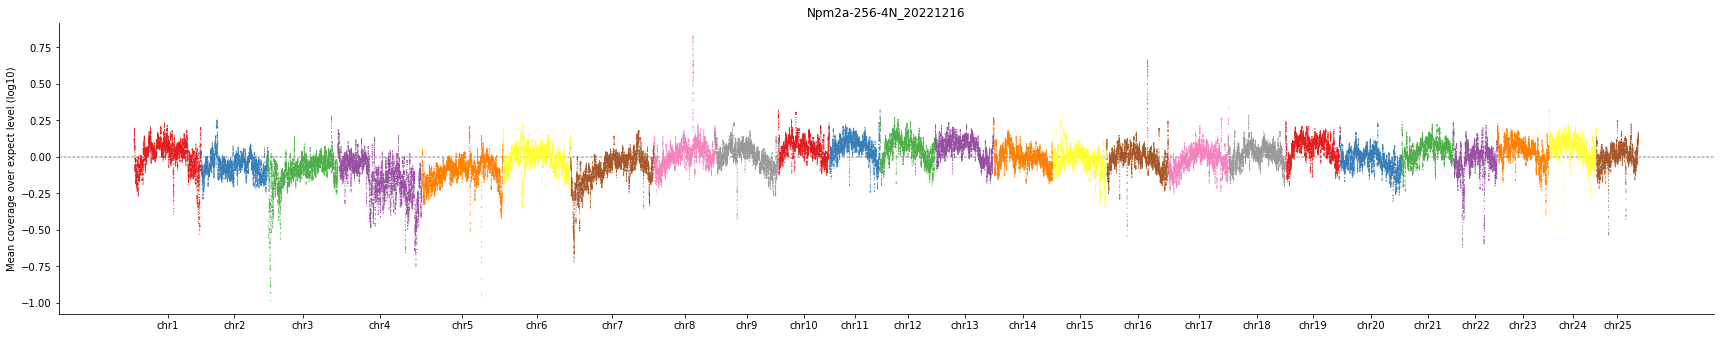

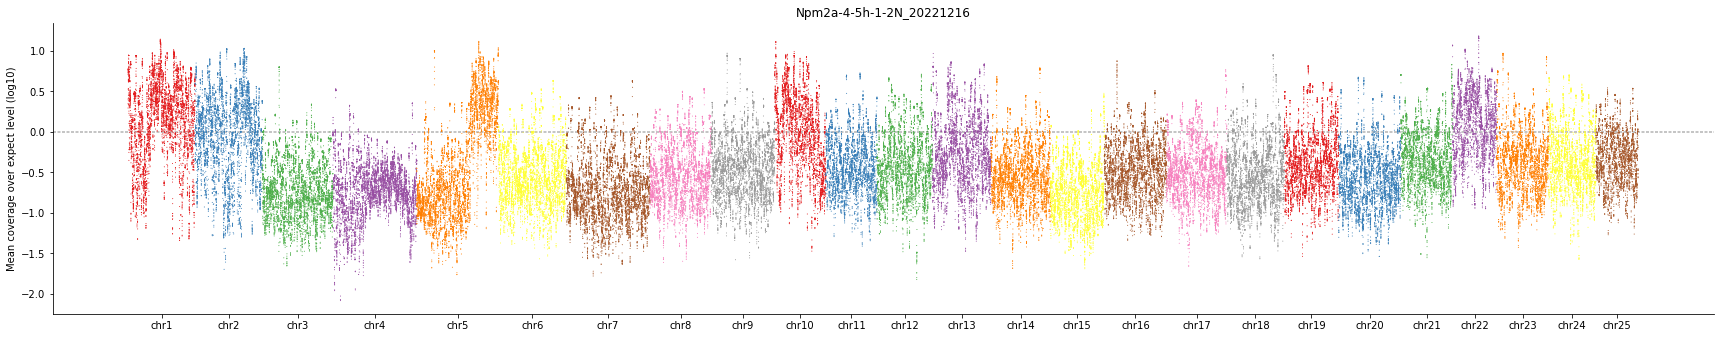

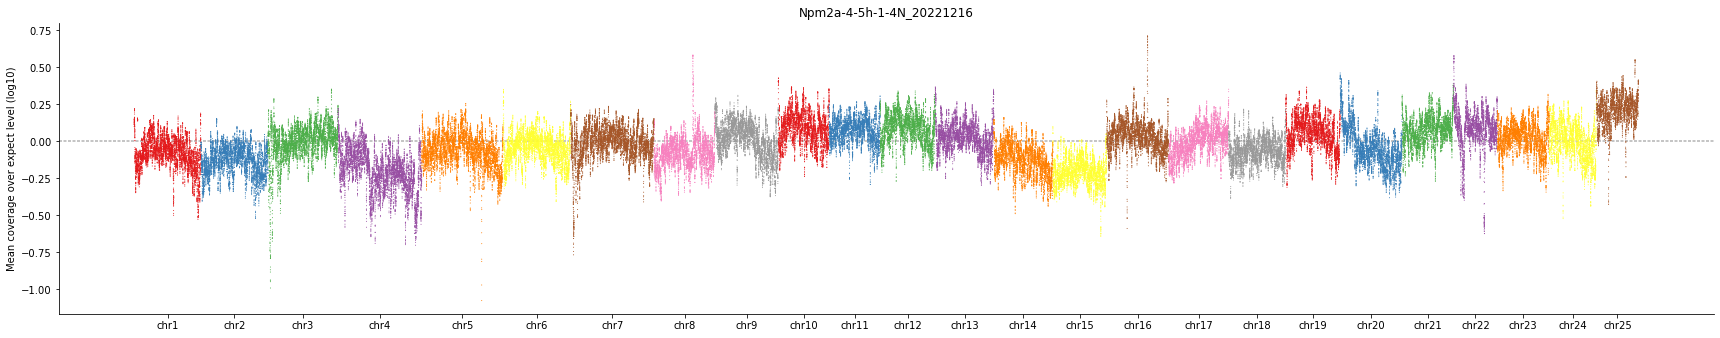

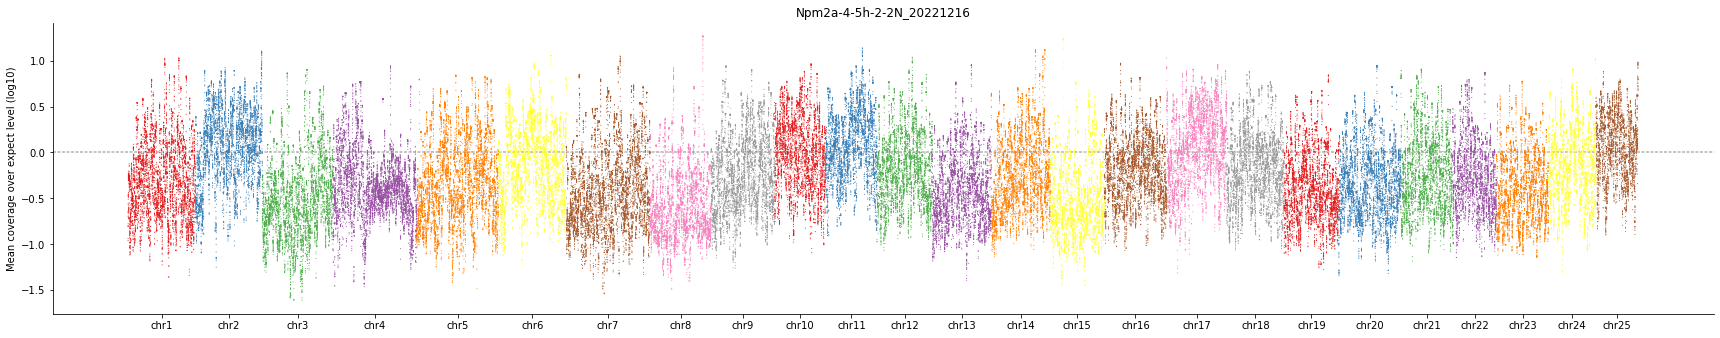

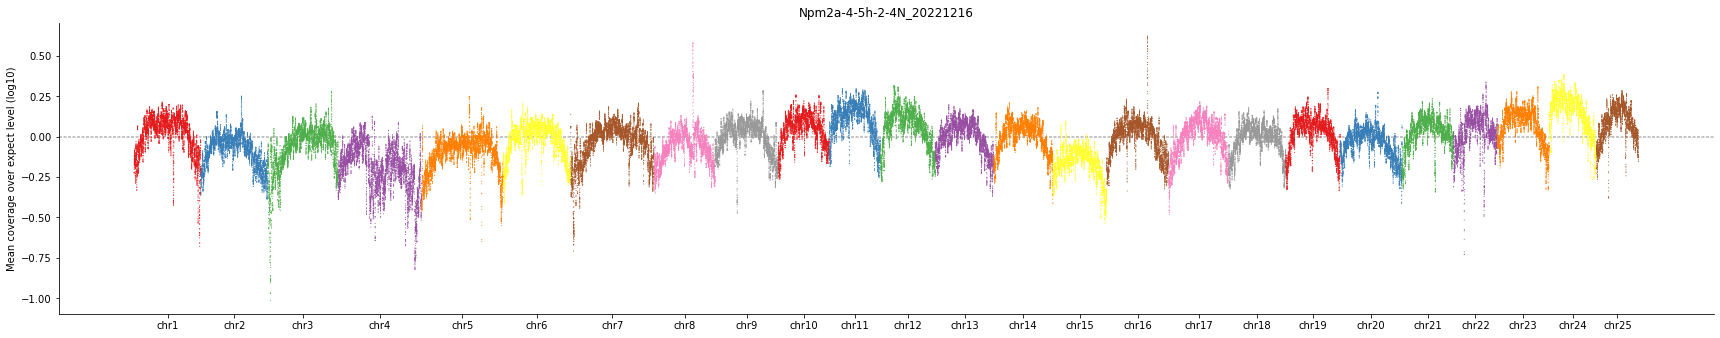

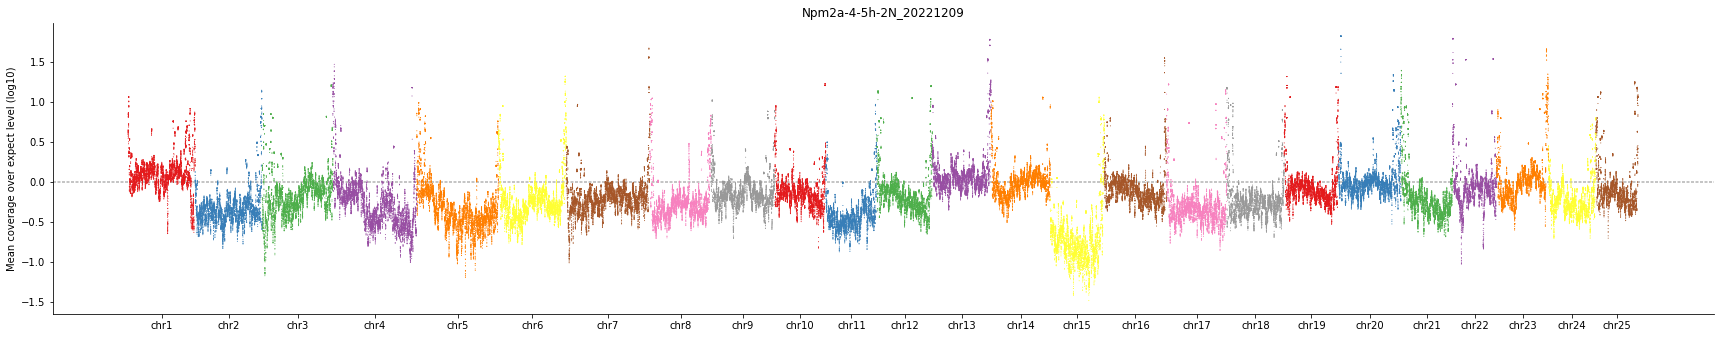

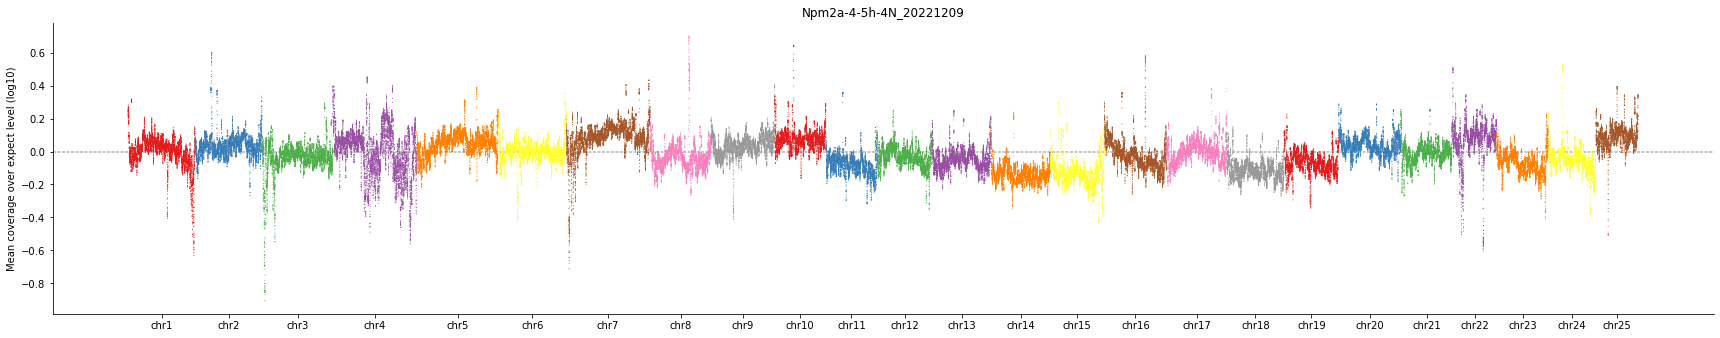

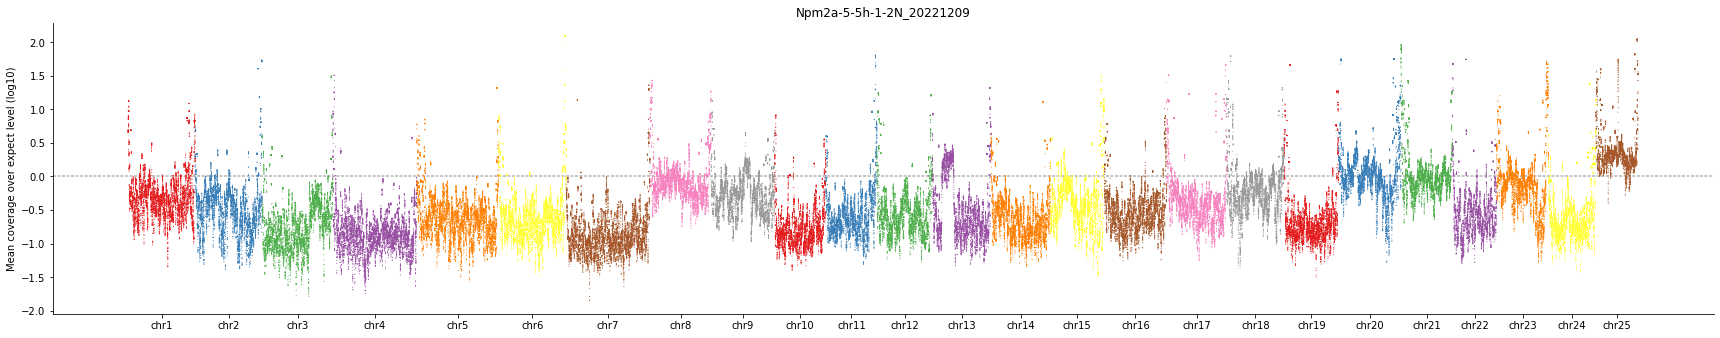

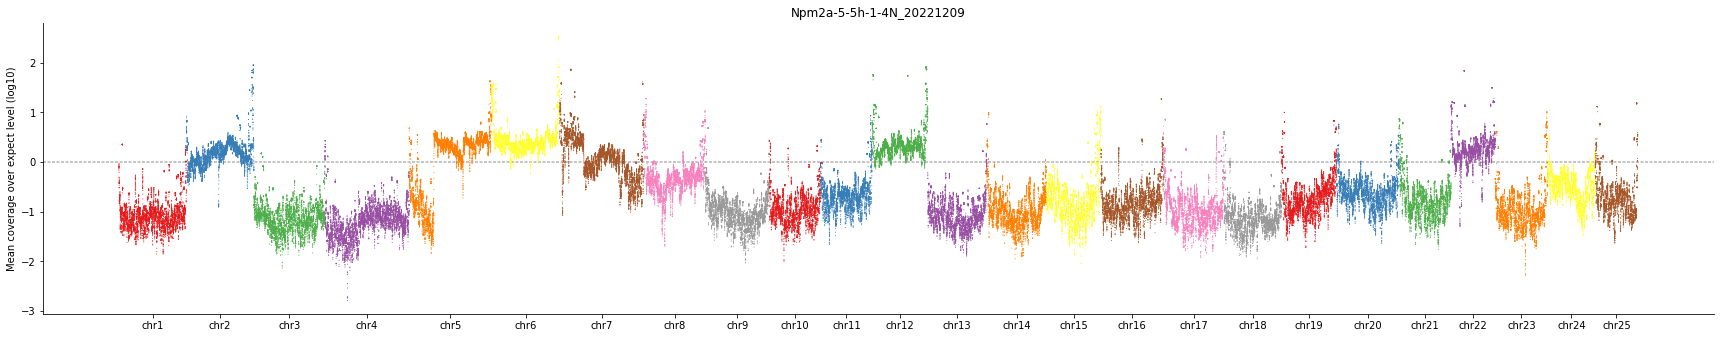

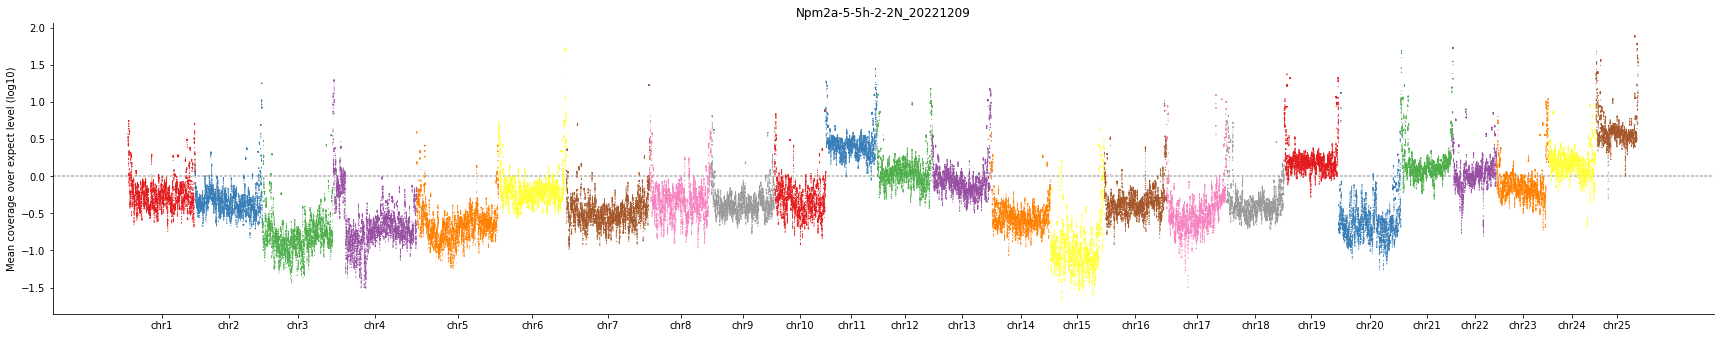

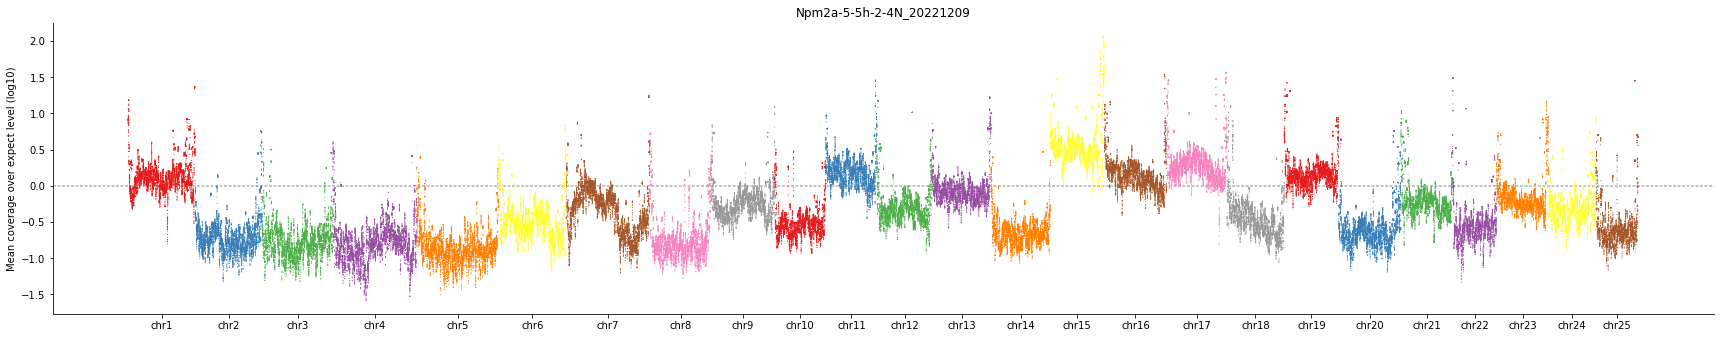

In [71]:
for log10_bdg in sorted(glob.glob(f'{home_dir}/maternal_loading/1.private_data/20221209_WGS/analysis/*.meanCovOverExpect_log10.bedGraph')) :
    df = pd.read_csv(log10_bdg, sep = "\t", header = None, names = ['chr', 'start', 'end', 'mean_coverage_ov_expect_log10'])
    df = df.loc[df['chr'] != 'chrM']
    df['chr_num'] = df['chr'].str.split('r', expand = True)[1].astype(int)
    df = df.sort_values(['chr_num', 'start']).reset_index()
    df['index'] = df.index
    # fig, ax = plt.subplots(figsize = (20,5), tight_layout = True)
    plot = sns.relplot(
        data = df,
        x = 'index',
        y = 'mean_coverage_ov_expect_log10',
        s = 1,
        height = 4.8, 
        aspect = 5,
        hue='chr', 
        palette = 'Set1', 
        legend=None,
        linewidth = 0
    )
    chrom_df=df.groupby('chr')['index'].median()
    plot.ax.set_xlabel('')
    plot.ax.set_ylabel('Mean coverage over expect level (log10)')
    plot.ax.set_title(log10_bdg.split('/')[-1].split('.')[0])
    plot.ax.set_xticks(chrom_df);
    plot.ax.set_xticklabels(chrom_df.index)
    # plot.ax.axhline()
    plot.map(plt.axhline, y=0, color=".7", dashes=(2, 1), zorder=0).tight_layout(w_pad=0)
    # plot.savefig(f'/Users/wym1193/Desktop/maternal_loading/private_data/202212_WGS/make3_manhattan_totalChrom_{log10_bdg.split("/")[-1].split(".")[0]}.pdf', transparent = True)
    plot.savefig(f'{home_dir}/maternal_loading/1.private_data/20221209_WGS/figures/make3_manhattan_totalChrom_{log10_bdg.split("/")[-1].split(".")[0]}.pdf', transparent = True)    
    

In [49]:
df

index   chr     start       end  mean_coverage_ov_expect_log10  chr_num
0         0  chr7         0    200000                       0.143577        7
1         1  chr7     10000    210000                       0.071474        7
2         2  chr7     20000    220000                       0.071025        7
3         3  chr7     30000    230000                       0.078584        7
4         4  chr7     40000    240000                       0.079196        7
...     ...   ...       ...       ...                            ...      ...
7405   7405  chr7  74050000  74250000                       0.016547        7
7406   7406  chr7  74060000  74260000                       0.004026        7
7407   7407  chr7  74070000  74270000                       0.021632        7
7408   7408  chr7  74080000  74280000                       0.012667        7
7409   7409  chr7  74090000  74282399                       0.007400        7

[7410 rows x 6 columns]

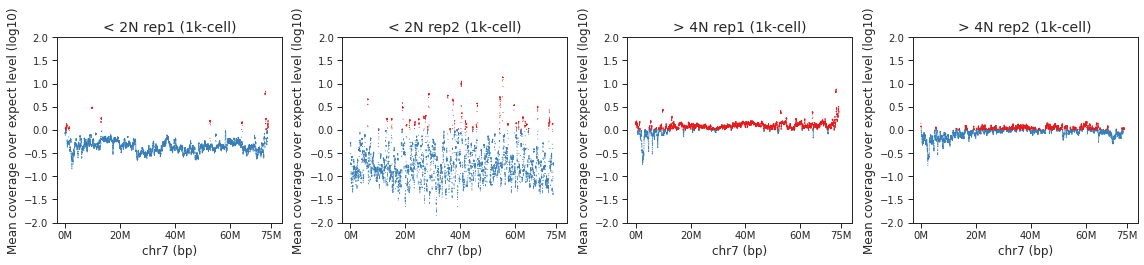

In [89]:
### inspect one sample, on chromosome
from statannot import add_stat_annotation

with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    
    os.chdir(f'{home_dir}/maternal_loading/1.private_data/20221209_WGS/analysis/')
    fig, axes = plt.subplots(1,4,figsize = (6.4 * 2.5, 4.8 * .75), tight_layout = True)
    title_ls = ['< 2N rep1 (1k-cell)', '< 2N rep2 (1k-cell)', '> 4N rep1 (1k-cell)', '> 4N rep2 (1k-cell)']
    for i,name in enumerate(['Npm2a-1k-2N_20221209', 'Npm2a-1k-2N_20221216', 'Npm2a-1k-4N_20221209', 'Npm2a-1k-4N_20221216']) :
        ax = axes[i]
        df = pd.read_csv(f'{name}.meanCovOverExpect_log10.bedGraph', sep = "\t", header = None, names = ['chr', 'start', 'end', 'mean_coverage_ov_expect_log10'])
        df = df.loc[df['chr'] == 'chr7']
        df['chr_num'] = df['chr'].str.split('r', expand = True)[1].astype(int)
        df = df.sort_values(['chr_num', 'start']).reset_index()
        df['index'] = df.index
        df['pos_neg'] =[x<0 for x in df['mean_coverage_ov_expect_log10']]
        p = sns.scatterplot(
            data = df,
            x = 'index',
            y = 'mean_coverage_ov_expect_log10',
            s = 1,
            # height = 4.8, 
            # aspect = 1,
            hue='pos_neg', 
            palette = 'Set1', 
            legend=None,
            linewidth = 0,
            ax = ax
        )
        # chrom_df=df.groupby('chr')['index'].median()
        ax.set_xlabel('chr7 (bp)')
        ax.set_ylabel('Mean coverage over expect level (log10)')
        ax.set_title(title_ls[i])
        ax.set_xlim(-300,7900)
        ax.set_ylim(-2,2)
        ax.set_xticks(list(range(0, 7500, 2000)) + [7500]);
        ax.set_xticklabels([f'{int(x / 100)}M' for x in range(0, 7500, 2000)] + ['75M'])
        fig.savefig(f'{home_dir}/maternal_loading/1.private_data/20221209_WGS/figures/make3_manhattan_chr7_1k.pdf', transparent = True)    
    

## read counts / mappable length ratio

In [ ]:
### !!! not extract balck list length yet

In [57]:
### read counts ratio
os.chdir(f'{home_dir}/maternal_loading/1.private_data/20221209_WGS/2_signal')
chrom_readcnt_df = pd.DataFrame()
for i,name in enumerate(name_list) :
    df = pd.read_csv(f'{name}_chromosome_distribution.txt', sep = "\t", header = 0, names = ['chr', name])
    if i == 0 :
        chrom_readcnt_df = df
    else :
        chrom_readcnt_df = pd.merge(chrom_readcnt_df, df, on = 'chr')
        
chrom_readcnt_df_eu = chrom_readcnt_df.loc[~chrom_readcnt_df['chr'].isin(['.', 'chrM'])]
chrom_readcnt_df_eu['chr_num'] = chrom_readcnt_df_eu['chr'].copy().str.split('r', expand = True)[1].astype(int).to_list()
chrom_readcnt_df_eu = chrom_readcnt_df_eu.sort_values(['chr_num'])
chrom_readcnt_df_eu.index = chrom_readcnt_df_eu['chr']
chrom_readcnt_df_eu

/tmp/ipykernel_560/1880839834.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chrom_readcnt_df_eu['chr_num'] = chrom_readcnt_df_eu['chr'].copy().str.split('r', expand = True)[1].astype(int).to_list()


chr  Npm2a-1k-2N_20221209  Npm2a-1k-2N_20221216  \
chr                                                        
chr1    chr1                574101                891188   
chr2    chr2                371503                595443   
chr3    chr3                313504               1126591   
chr4    chr4                396144                445051   
chr5    chr5                341967                731296   
chr6    chr6                466002                838769   
chr7    chr7                333769                539202   
chr8    chr8                443795                528349   
chr9    chr9                301311                464206   
chr10  chr10                334094                724516   
chr11  chr11                861227               1070363   
chr12  chr12                894760                659228   
chr13  chr13                401199                769393   
chr14  chr14                472038               1427758   
chr15  chr15                349903                765111   
chr16  chr16                498614               2106908   
chr17  chr17                418377                745255   
chr18  chr18                730722                779664   
chr19  chr19                416379                707203   
chr20  chr20                351074                633386   
chr21  chr21                438916                989019   
chr22  chr22                452138                500630   
chr23  chr23                645114                667379   
chr24  chr24                904686                683223   
chr25  chr25                531766                358076   

       Npm2a-1k-4N_20221209  Npm2a-1k-4N_20221216  Npm2a-256-2N_20221209  \
chr                                                                        
chr1                 282620               1229118                 140331   
chr2                 595435                889285                 327424   
chr3                 682264                954631                 136298   
chr4                 635256                890904                 304459   
chr5                 684280               1220576                 208578   
chr6                 428857                894008                1445373   
chr7                 750723               1094927                 284953   
chr8                 436861                735387                 468333   
chr9                 451519                770187                 144038   
chr10                265727               1032114                 118984   
chr11                472852                964352                 582011   
chr12                389345               1011771                 207485   
chr13                431532                953219                1131588   
chr14                453168                799797                 108513   
chr15                517259                885921                 134089   
chr16                465766                867571                 177091   
chr17                391801                802747                 511324   
chr18                395549                918151                 181281   
chr19                407691                828411                2843274   
chr20                426097                836277                 304332   
chr21                592815                957429                 621664   
chr22                266163                831909                  92329   
chr23                563030                784229                 160315   
chr24                346540                806185                 245220   
chr25                313545                782336                 100127   

       Npm2a-256-2N_20221216  Npm2a-256-4N_20221209  Npm2a-256-4N_20221216  \
chr                                                                          
chr1                  785947                 483629                 857425   
chr2                  452360                 597484                 681780   
chr3                  7

In [58]:
chrom_readcnt_df_eu_ratio = chrom_readcnt_df_eu[name_list].apply(lambda x : x / sum(x))
chrom_readcnt_df_eu_ratio

Npm2a-1k-2N_20221209  Npm2a-1k-2N_20221216  Npm2a-1k-4N_20221209  \
chr                                                                       
chr1               0.046892              0.045130              0.024266   
chr2               0.030344              0.030153              0.051125   
chr3               0.025607              0.057051              0.058580   
chr4               0.032357              0.022537              0.054544   
chr5               0.027931              0.037033              0.058753   
chr6               0.038062              0.042475              0.036822   
chr7               0.027262              0.027305              0.064458   
chr8               0.036249              0.026756              0.037509   
chr9               0.024611              0.023507              0.038768   
chr10              0.027288              0.036690              0.022816   
chr11              0.070344              0.054203              0.040600   
chr12              0.073083              0.033383              0.033430   
chr13              0.032769              0.038962              0.037052   
chr14              0.038555              0.072302              0.038910   
chr15              0.028580              0.038745              0.044413   
chr16              0.040726              0.106694              0.039991   
chr17              0.034172              0.037740              0.033641   
chr18              0.059684              0.039482              0.033962   
chr19              0.034009              0.035813              0.035005   
chr20              0.028675              0.032075              0.036585   
chr21              0.035850              0.050084              0.050900   
chr22              0.036930              0.025352              0.022853   
chr23              0.052692              0.033796              0.048342   
chr24              0.073894              0.034598              0.029754   
chr25              0.043434              0.018133              0.026921   

       Npm2a-1k-4N_20221216  Npm2a-256-2N_20221209  Npm2a-256-2N_20221216  \
chr                                                                         
chr1               0.054047               0.012781               0.050996   
chr2               0.039104               0.029822               0.029352   
chr3               0.041978               0.012414               0.046381   
chr4               0.039175               0.027730               0.036790   
chr5               0.053672               0.018997               0.041783   
chr6               0.039312               0.131644               0.058353   
chr7               0.048147               0.025953               0.046732   
chr8               0.032337               0.042656               0.021580   
chr9               0.033867               0.013119               0.082264   
chr10              0.045385               0.010837               0.027533   
chr11              0.042405               0.053009               0.016221   
chr12              0.044490               0.018898               0.023354   
chr13              0.041916               0.103065               0.047750   
chr14              0.035169               0.009883               0.032865   
chr15              0.038956               0.012213               0.023883   
chr16              0.038149               0.016129               0.033505   
chr17              0.035299               0.046571               0.035908   
chr18              0.040373               0.016511               0.117240   
chr19              0.036427               0.258964               0.081399   
chr20              0.036773               0.027718               0.035039   
chr21              0.042101               0.056621               0.023551   
chr22              0.036581               0.008409               0.021494   
chr23              0.034485               0.014601               0.025190   
chr24              0.035450               0.022335      

In [59]:
### mappable length ratio (black list have not exclude yet)

In [66]:
chrom_size_ratio = chrom_size.apply(lambda x : x /sum(x))
chrom_readcnt_size_df_eu_ratio = pd.merge(chrom_readcnt_df_eu_ratio, chrom_size_ratio.loc[chrom_size_ratio.index != 'chrM'], left_index=True, right_index=True)

In [73]:
chrom_readcnt_size_ratio = chrom_readcnt_size_df_eu_ratio.apply(lambda x : x / x[0], axis = 1,).drop(0, axis = 1)

In [74]:
chrom_readcnt_size_ratio

Npm2a-1k-2N_20221209  Npm2a-1k-2N_20221216  Npm2a-1k-4N_20221209  \
chr1               1.055862              1.016188              0.546400   
chr2               0.682538              0.678251              1.149973   
chr3               0.548502              1.222044              1.254805   
chr4               0.582654              0.405838              0.982189   
chr5               0.516834              0.685245              1.087149   
chr6               0.847214              0.945439              0.819609   
chr7               0.492342              0.493126              1.164098   
chr8               0.895472              0.660962              0.926620   
chr9               0.584766              0.558552              0.921153   
chr10              0.805972              1.083640              0.673870   
chr11              2.074712              1.598664              1.197441   
chr12              1.993420              0.910571              0.911834   
chr13              0.842388              1.001582              0.952477   
chr14              0.982202              1.841893              0.991225   
chr15              0.798080              1.081954              1.240211   
chr16              0.988575              2.589860              0.970737   
chr17              0.857505              0.947021              0.844157   
chr18              1.569238              1.038078              0.892947   
chr19              0.941681              0.991619              0.969248   
chr20              0.696877              0.779492              0.889108   
chr21              1.047016              1.462724              1.486551   
chr22              1.266000              0.869091              0.783428   
chr23              1.529254              0.980848              1.403019   
chr24              2.350558              1.100579              0.946488   
chr25              1.553719              0.648654              0.963031   

       Npm2a-1k-4N_20221216  Npm2a-256-2N_20221209  Npm2a-256-2N_20221216  \
chr1               1.216987               0.287796               1.148286   
chr2               0.879588               0.670791               0.660217   
chr3               0.899174               0.265911               0.993491   
chr4               0.705443               0.499342               0.662492   
chr5               0.993127               0.351518               0.773130   
chr6               0.875024               2.930201               1.298862   
chr7               0.869520               0.468712               0.843964   
chr8               0.798839               1.053748               0.533116   
chr9               0.804705               0.311714               1.954638   
chr10              1.340456               0.320075               0.813203   
chr11              1.250689               1.563449               0.478416   
chr12              1.213523               0.515456               0.637013   
chr13              1.077504               2.649435               1.227489   
chr14              0.895937               0.251778               0.837248   
chr15              1.087845               0.341039               0.666938   
chr16              0.926027               0.391520               0.813285   
chr17              0.885770               1.168631               0.901054   
chr18              1.061511               0.434112               3.082494   
chr19              1.008636               7.170445               2.253852   
chr20              0.893678               0.673623               0.851532   
chr21              1.229566               1.653636               0.687829   
chr22              1.254042               0.288279               0.736838   
chr23              1.000828               0.423769               0.731087   
chr24              1.127668               0.710463               0.652560   
chr25              1.230605               0.326224               0.726968   

       Npm2a-256-4N_20221209  Npm2a-256-4N_20221216  

In [78]:
stage_order = {
    '256-cell' : 0,
    '1k-cell' : 1,
    '4.5hpf' : 2,
    '5.5hpf' : 3
}

In [79]:
stage_dict = {
    '256': '256-cell',
    '1k': '1k-cell',
    '4': '4.5hpf',
    '5': '5.5hpf'
}

chr1      chr2      chr3      chr4      chr5  \
Npm2a-256-2N_20221209    -1.796881 -0.576064 -1.910983 -1.001899 -1.508330   
Npm2a-256-2N_20221216     0.199482 -0.598988 -0.009421 -0.594025 -0.371217   
Npm2a-1k-2N_20221209      0.078421 -0.551018 -0.866432 -0.779290 -0.952228   
Npm2a-1k-2N_20221216      0.023167 -0.560108  0.289297 -1.301023 -0.545309   
Npm2a-4-5h-1-2N_20221216  1.675535  1.095562 -1.358364 -1.506702  0.573276   
Npm2a-4-5h-2-2N_20221216 -0.044608  0.804293 -0.813368 -0.589368 -0.257338   
Npm2a-4-5h-2N_20221209    0.640965 -0.762933 -0.205354 -0.253549 -0.623251   
Npm2a-5-5h-1-2N_20221209 -0.201340 -0.234909 -1.234234 -1.589000 -1.180498   
Npm2a-5-5h-2-2N_20221209 -0.418189 -0.752987 -2.222702 -1.250503 -1.842492   
Npm2a-256-4N_20221209    -0.347979 -0.044488 -0.235349 -0.743543 -0.203716   
Npm2a-256-4N_20221216     0.147789 -0.184424 -0.319512 -0.427626 -0.359946   
Npm2a-1k-4N_20221209     -0.871971  0.201600  0.327463 -0.025928  0.120550   
Npm2a-1k-4N_20221216      0.283314 -0.185101 -0.153327 -0.503399 -0.009950   
Npm2a-4-5h-1-4N_20221216 -0.095144 -0.390253 -0.025084 -0.628916 -0.245195   
Npm2a-4-5h-2-4N_20221216  0.208421 -0.234836 -0.222651 -0.619697 -0.367498   
Npm2a-4-5h-4N_20221209    0.120593  0.149532 -0.124534  0.058033  0.123029   
Npm2a-5-5h-1-4N_20221209 -2.690894  1.387261 -3.027747 -3.195208  1.028204   
Npm2a-5-5h-2-4N_20221209  0.744694 -1.841729 -2.124336 -2.187175 -2.435043   

                              chr6      chr7      chr8      chr9     chr10  \
Npm2a-256-2N_20221209     1.551000 -1.093225  0.075530 -1.681704 -1.643516   
Npm2a-256-2N_20221216     0.377248 -0.244747 -0.907478  0.966901 -0.298312   
Npm2a-1k-2N_20221209     -0.239202 -1.022267 -0.159280 -0.774069 -0.311198   
Npm2a-1k-2N_20221216     -0.080944 -1.019971 -0.597361 -0.840236  0.115886   
Npm2a-4-5h-1-2N_20221216 -0.883804 -1.255200 -0.829661 -0.510317  1.219215   
Npm2a-4-5h-2-2N_20221216  0.146168 -0.521745 -1.042314 -0.155323  0.679279   
Npm2a-4-5h-2N_20221209   -0.200943 -0.307612 -0.343647 -0.199660 -0.078311   
Npm2a-5-5h-1-2N_20221209 -0.380045 -1.708335  0.474048 -0.315478 -1.666062   
Npm2a-5-5h-2-2N_20221209 -0.075301 -1.267109 -0.775260 -0.976521 -0.548874   
Npm2a-256-4N_20221209    -0.197569 -1.060043 -0.004552 -0.851065  0.146737   
Npm2a-256-4N_20221216    -0.064581 -0.306722  0.040723 -0.040873  0.287123   
Npm2a-1k-4N_20221209     -0.286993  0.219212 -0.109950 -0.118487 -0.569459   
Npm2a-1k-4N_20221216     -0.192605 -0.201709 -0.324024 -0.313468  0.422724   
Npm2a-4-5h-1-4N_20221216 -0.216281 -0.108094 -0.336027 -0.058643  0.438929   
Npm2a-4-5h-2-4N_20221216 -0.143509 -0.188673 -0.291154 -0.114750  0.293765   
Npm2a-4-5h-4N_20221209   -0.055180  0.238240 -0.147872  0.029233  0.341587   
Npm2a-5-5h-1-4N_20221209  2.248753  1.068324 -0.384868 -2.661959 -2.283600   
Npm2a-5-5h-2-4N_20221209 -1.272603 -0.666319 -1.874711 -0.528534 -1.295877   

                          ...     chr16     chr17     chr18     chr19  \
Npm2a-256-2N_20221209     ... -1.352843  0.224820 -1.203862  2.842063   
Npm2a-256-2N_20221216     ... -0.298166 -0.150315  1.624098  1.172393   
Npm2a-1k-2N_20221209      ... -0.016578 -0.221783  0.650065 -0.086689   
Npm2a-1k-2N_20221216      ...  1.372874 -0.078532  0.053915 -0.012142   
Npm2a-4-5h-1-2N_20221216  ... -0.561171 -0.633301 -0.606580 -0.131869   
Npm2a-4-5h-2-2N_20221216  ...  0.051226  0.840189  0.097323 -0.566097   
Npm2a-4-5h-2N_20221209    ...  0.058166 -0.330347 -0.256886  0.239566   
Npm2a-5-5h-1-2N_20221209  ... -0.898914  0.386419  0.408986 -0.484822   
Npm2a-5-5h-2-2N_20221209  ... -0.766528 -0.612206 -0.778407  1.056376   
Npm2a-256-4N_20221209     ... -0.073460  0.633965  0.243669 -0.300576   
Npm2a-256-4N_20221216     ...  0.024409 -0.012681  0.087654  0.229970   
Npm2a-1k-4N_20221209      ... -0.042848 -0.244417 -0.163353 -0.045062   
Npm2a-1k-4N_20221216      ... -0.110874 -0.174996  0.086119  0.012406   
Npm2a-4-5h-1-4N_20221216  ...  0.202390  0

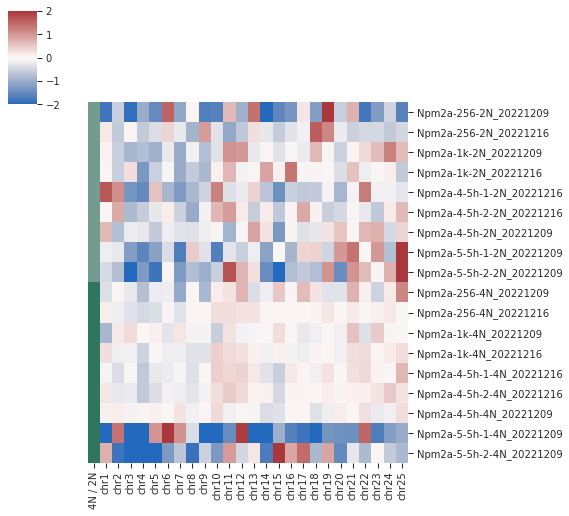

In [105]:
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    plot_df = chrom_readcnt_size_ratio.copy().T
    plot_df['names'] = plot_df.index
    plot_df['4N / 2N'] = [x[-2:] for x in plot_df['names'].str.split('_', expand = True)[0]]
    plot_df['stage'] = plot_df['names'].str.split('-', expand = True)[1]
    plot_df['stage'] = [stage_dict[x] for x in plot_df['stage']]
    plot_df['stage-nuclear'] = plot_df['stage'] + ' ' + plot_df['4N / 2N']
    plot_df['stage_order'] = [stage_order[x] for x in plot_df['stage']]
    plot_df = plot_df.sort_values(['4N / 2N', 'stage_order'])
    plot_df_log2 = plot_df.iloc[:,:-5].apply(lambda x : np.log2(x))

    
    lut = dict(zip(plot_df['4N / 2N'].unique(), ['#739C90', '#2E765E']))
    row_colors = plot_df['4N / 2N'].map(lut)
    
    c = sns.clustermap(
        plot_df_log2,
        col_cluster = False,
        row_cluster = False,
        cmap="vlag",
#         cmap="Reds",
        vmin = -2,
        vmax = 2,
        figsize = (6.4 * 1.25, 4.8 * 1.5),
#         z_score = 0,
        row_colors = row_colors
    )

    c.savefig('/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/20221209_WGS/figures/make3_heastmap_chrom_coverage_ov_len.pdf', transparent = True)
plot_df_log2

# region level

## merge continuous >0 / <0 bins

In [90]:
for log10_bdg in sorted(glob.glob(f'{home_dir}/maternal_loading/1.private_data/20221209_WGS/analysis/*.meanCovOverExpect_log10.bedGraph')) :
    df = pd.read_csv(log10_bdg, sep = "\t", header = None, names = ['chr', 'start', 'end', 'mean_coverage_ov_expect_log10'])
    df_pos = df.loc[df['mean_coverage_ov_expect_log10'] > 0]
    df_neg = df.loc[df['mean_coverage_ov_expect_log10'] < 0]
    df_pos.to_csv(f'{log10_bdg}.posBins', sep = "\t", header = False, index = False)
    df_neg.to_csv(f'{log10_bdg}.negBins', sep = "\t", header = False, index = False)    

In [92]:
home_dir

'/mnt/Storage/home/wangyiman'

In [95]:
%%bash
### merge 20kb bins into regions which length over 1Mb
cd /mnt/Storage/home/wangyiman/maternal_loading/1.private_data/20221209_WGS/analysis/
for bdg in *.meanCovOverExpect_log10.bedGraph.*Bins;do
    bedtools merge -i $bdg -c 4 -o mean | awk 'BEGIN{FS=OFS="\t"}($3-$2)>=1000000{print}' > ${bdg}.merged.1Mb
done

In [100]:
%%bash
### replicates overlap regions

cd /mnt/Storage/home/wangyiman/maternal_loading/1.private_data/20221209_WGS/analysis/

### 256 2N
bedtools intersect -a Npm2a-256-2N_20221209.meanCovOverExpect_log10.bedGraph.negBins.merged.1Mb -b Npm2a-256-2N_20221216.meanCovOverExpect_log10.bedGraph.negBins.merged.1Mb | awk 'BEGIN{FS=OFS="\t"}($3-$2)>=1000000{print $1,$2,$3}' > Npm2a-256-2N.neg_1Mb.bed
bedtools intersect -a Npm2a-256-2N_20221209.meanCovOverExpect_log10.bedGraph.posBins.merged.1Mb -b Npm2a-256-2N_20221216.meanCovOverExpect_log10.bedGraph.posBins.merged.1Mb | awk 'BEGIN{FS=OFS="\t"}($3-$2)>=1000000{print $1,$2,$3}' > Npm2a-256-2N.pos_1Mb.bed
### 256 4N
bedtools intersect -a Npm2a-256-4N_20221209.meanCovOverExpect_log10.bedGraph.negBins.merged.1Mb -b Npm2a-256-4N_20221216.meanCovOverExpect_log10.bedGraph.negBins.merged.1Mb | awk 'BEGIN{FS=OFS="\t"}($3-$2)>=1000000{print $1,$2,$3}' > Npm2a-256-4N.neg_1Mb.bed
bedtools intersect -a Npm2a-256-4N_20221209.meanCovOverExpect_log10.bedGraph.posBins.merged.1Mb -b Npm2a-256-4N_20221216.meanCovOverExpect_log10.bedGraph.posBins.merged.1Mb | awk 'BEGIN{FS=OFS="\t"}($3-$2)>=1000000{print $1,$2,$3}' > Npm2a-256-4N.pos_1Mb.bed
### 1k 2N
bedtools intersect -a Npm2a-1k-2N_20221209.meanCovOverExpect_log10.bedGraph.negBins.merged.1Mb -b Npm2a-1k-2N_20221216.meanCovOverExpect_log10.bedGraph.negBins.merged.1Mb | awk 'BEGIN{FS=OFS="\t"}($3-$2)>=1000000{print $1,$2,$3}' > Npm2a-1k-2N.neg_1Mb.bed
bedtools intersect -a Npm2a-1k-2N_20221209.meanCovOverExpect_log10.bedGraph.posBins.merged.1Mb -b Npm2a-1k-2N_20221216.meanCovOverExpect_log10.bedGraph.posBins.merged.1Mb | awk 'BEGIN{FS=OFS="\t"}($3-$2)>=1000000{print $1,$2,$3}' > Npm2a-1k-2N.pos_1Mb.bed
### 1k 4N
bedtools intersect -a Npm2a-1k-4N_20221209.meanCovOverExpect_log10.bedGraph.negBins.merged.1Mb -b Npm2a-1k-4N_20221216.meanCovOverExpect_log10.bedGraph.negBins.merged.1Mb | awk 'BEGIN{FS=OFS="\t"}($3-$2)>=1000000{print $1,$2,$3}' > Npm2a-1k-4N.neg_1Mb.bed
bedtools intersect -a Npm2a-1k-4N_20221209.meanCovOverExpect_log10.bedGraph.posBins.merged.1Mb -b Npm2a-1k-4N_20221216.meanCovOverExpect_log10.bedGraph.posBins.merged.1Mb | awk 'BEGIN{FS=OFS="\t"}($3-$2)>=1000000{print $1,$2,$3}' > Npm2a-1k-4N.pos_1Mb.bed
### 4.5h 2N
bedtools intersect -a Npm2a-4-5h-1-2N_20221216.meanCovOverExpect_log10.bedGraph.negBins.merged.1Mb -b Npm2a-4-5h-2-2N_20221216.meanCovOverExpect_log10.bedGraph.negBins.merged.1Mb | bedtools intersect -a - -b Npm2a-4-5h-2N_20221209.meanCovOverExpect_log10.bedGraph.negBins.merged.1Mb | awk 'BEGIN{FS=OFS="\t"}($3-$2)>=1000000{print $1,$2,$3}' > Npm2a-4p5-2N.neg_1Mb.bed
bedtools intersect -a Npm2a-4-5h-1-2N_20221216.meanCovOverExpect_log10.bedGraph.posBins.merged.1Mb -b Npm2a-4-5h-2-2N_20221216.meanCovOverExpect_log10.bedGraph.posBins.merged.1Mb | bedtools intersect -a - -b Npm2a-4-5h-2N_20221209.meanCovOverExpect_log10.bedGraph.posBins.merged.1Mb | awk 'BEGIN{FS=OFS="\t"}($3-$2)>=1000000{print $1,$2,$3}' > Npm2a-4p5-2N.pos_1Mb.bed
### 4.5h 4N
bedtools intersect -a Npm2a-4-5h-1-4N_20221216.meanCovOverExpect_log10.bedGraph.negBins.merged.1Mb -b Npm2a-4-5h-2-4N_20221216.meanCovOverExpect_log10.bedGraph.negBins.merged.1Mb | bedtools intersect -a - -b Npm2a-4-5h-4N_20221209.meanCovOverExpect_log10.bedGraph.negBins.merged.1Mb | awk 'BEGIN{FS=OFS="\t"}($3-$2)>=1000000{print $1,$2,$3}' > Npm2a-4p5-4N.neg_1Mb.bed
bedtools intersect -a Npm2a-4-5h-1-4N_20221216.meanCovOverExpect_log10.bedGraph.posBins.merged.1Mb -b Npm2a-4-5h-2-4N_20221216.meanCovOverExpect_log10.bedGraph.posBins.merged.1Mb | bedtools intersect -a - -b Npm2a-4-5h-4N_20221209.meanCovOverExpect_log10.bedGraph.posBins.merged.1Mb | awk 'BEGIN{FS=OFS="\t"}($3-$2)>=1000000{print $1,$2,$3}' > Npm2a-4p5-4N.pos_1Mb.bed
### 5.5h 2N
bedtools intersect -a Npm2a-5-5h-1-2N_20221209.meanCovOverExpect_log10.bedGraph.negBins.merged.1Mb -b Npm2a-5-5h-2-2N_20221209.meanCovOverExpect_log10.bedGraph.negBins.merged.1Mb | awk 'BEGIN{FS=OFS="\t"}($3-$2)>=1000000{print $1,$2,$3}' > Npm2a-5p5-2N.neg_1Mb.bed
bedtools intersect -a Npm2a-5-5h-1-2N_20221209.meanCovOverExpect_log10.bedGraph.posBins.merged.1Mb -b Npm2a-5-5h-2-2N_20221209.meanCovOverExpect_log10.bedGraph.posBins.merged.1Mb | awk 'BEGIN{FS=OFS="\t"}($3-$2)>=1000000{print $1,$2,$3}' > Npm2a-5p5-2N.pos_1Mb.bed
### 5.5h 4N
bedtools intersect -a Npm2a-5-5h-1-4N_20221209.meanCovOverExpect_log10.bedGraph.negBins.merged.1Mb -b Npm2a-5-5h-2-4N_20221209.meanCovOverExpect_log10.bedGraph.negBins.merged.1Mb | awk 'BEGIN{FS=OFS="\t"}($3-$2)>=1000000{print $1,$2,$3}' > Npm2a-5p5-4N.neg_1Mb.bed
bedtools intersect -a Npm2a-5-5h-1-4N_20221209.meanCovOverExpect_log10.bedGraph.posBins.merged.1Mb -b Npm2a-5-5h-2-4N_20221209.meanCovOverExpect_log10.bedGraph.posBins.merged.1Mb | awk 'BEGIN{FS=OFS="\t"}($3-$2)>=1000000{print $1,$2,$3}' > Npm2a-5p5-4N.pos_1Mb.bed


In [ ]:
## neg
   280 Npm2a-1k-2N.neg_1Mb.bed
   115 Npm2a-1k-2N_20221209.meanCovOverExpect_log10.bedGraph.negBins.merged.1Mb
   392 Npm2a-1k-2N_20221216.meanCovOverExpect_log10.bedGraph.negBins.merged.1Mb
   157 Npm2a-1k-4N.neg_1Mb.bed
   164 Npm2a-1k-4N_20221209.meanCovOverExpect_log10.bedGraph.negBins.merged.1Mb
   177 Npm2a-1k-4N_20221216.meanCovOverExpect_log10.bedGraph.negBins.merged.1Mb

   340 Npm2a-256-2N.neg_1Mb.bed
   169 Npm2a-256-2N_20221209.meanCovOverExpect_log10.bedGraph.negBins.merged.1Mb
   312 Npm2a-256-2N_20221216.meanCovOverExpect_log10.bedGraph.negBins.merged.1Mb
   193 Npm2a-256-4N.neg_1Mb.bed
   200 Npm2a-256-4N_20221209.meanCovOverExpect_log10.bedGraph.negBins.merged.1Mb
   184 Npm2a-256-4N_20221216.meanCovOverExpect_log10.bedGraph.negBins.merged.1Mb

   245 Npm2a-4-5h-1-2N_20221216.meanCovOverExpect_log10.bedGraph.negBins.merged.1Mb
   193 Npm2a-4-5h-1-4N_20221216.meanCovOverExpect_log10.bedGraph.negBins.merged.1Mb
   343 Npm2a-4-5h-2-2N_20221216.meanCovOverExpect_log10.bedGraph.negBins.merged.1Mb
   135 Npm2a-4-5h-2-4N_20221216.meanCovOverExpect_log10.bedGraph.negBins.merged.1Mb
   190 Npm2a-4-5h-2N_20221209.meanCovOverExpect_log10.bedGraph.negBins.merged.1Mb
   187 Npm2a-4-5h-4N_20221209.meanCovOverExpect_log10.bedGraph.negBins.merged.1Mb
   238 Npm2a-4p5-2N.neg_1Mb.bed
   106 Npm2a-4p5-4N.neg_1Mb.bed

   159 Npm2a-5-5h-1-2N_20221209.meanCovOverExpect_log10.bedGraph.negBins.merged.1Mb
    71 Npm2a-5-5h-1-4N_20221209.meanCovOverExpect_log10.bedGraph.negBins.merged.1Mb
   110 Npm2a-5-5h-2-2N_20221209.meanCovOverExpect_log10.bedGraph.negBins.merged.1Mb
   105 Npm2a-5-5h-2-4N_20221209.meanCovOverExpect_log10.bedGraph.negBins.merged.1Mb
   156 Npm2a-5p5-2N.neg_1Mb.bed
   103 Npm2a-5p5-4N.neg_1Mb.bed
    
## pos
   18 Npm2a-1k-2N.pos_1Mb.bed
   70 Npm2a-1k-2N_20221209.meanCovOverExpect_log10.bedGraph.posBins.merged.1Mb
   49 Npm2a-1k-2N_20221216.meanCovOverExpect_log10.bedGraph.posBins.merged.1Mb
   89 Npm2a-1k-4N.pos_1Mb.bed
  126 Npm2a-1k-4N_20221209.meanCovOverExpect_log10.bedGraph.posBins.merged.1Mb
  164 Npm2a-1k-4N_20221216.meanCovOverExpect_log10.bedGraph.posBins.merged.1Mb

    9 Npm2a-256-2N.pos_1Mb.bed
   25 Npm2a-256-2N_20221209.meanCovOverExpect_log10.bedGraph.posBins.merged.1Mb
   57 Npm2a-256-2N_20221216.meanCovOverExpect_log10.bedGraph.posBins.merged.1Mb
   66 Npm2a-256-4N.pos_1Mb.bed
  103 Npm2a-256-4N_20221209.meanCovOverExpect_log10.bedGraph.posBins.merged.1Mb
  172 Npm2a-256-4N_20221216.meanCovOverExpect_log10.bedGraph.posBins.merged.1Mb

   65 Npm2a-4-5h-1-2N_20221216.meanCovOverExpect_log10.bedGraph.posBins.merged.1Mb
  200 Npm2a-4-5h-1-4N_20221216.meanCovOverExpect_log10.bedGraph.posBins.merged.1Mb
  136 Npm2a-4-5h-2-2N_20221216.meanCovOverExpect_log10.bedGraph.posBins.merged.1Mb
  145 Npm2a-4-5h-2-4N_20221216.meanCovOverExpect_log10.bedGraph.posBins.merged.1Mb
  107 Npm2a-4-5h-2N_20221209.meanCovOverExpect_log10.bedGraph.posBins.merged.1Mb
  159 Npm2a-4-5h-4N_20221209.meanCovOverExpect_log10.bedGraph.posBins.merged.1Mb
    4 Npm2a-4p5-2N.pos_1Mb.bed
   75 Npm2a-4p5-4N.pos_1Mb.bed

   64 Npm2a-5-5h-1-2N_20221209.meanCovOverExpect_log10.bedGraph.posBins.merged.1Mb
   38 Npm2a-5-5h-1-4N_20221209.meanCovOverExpect_log10.bedGraph.posBins.merged.1Mb
   70 Npm2a-5-5h-2-2N_20221209.meanCovOverExpect_log10.bedGraph.posBins.merged.1Mb
   69 Npm2a-5-5h-2-4N_20221209.meanCovOverExpect_log10.bedGraph.posBins.merged.1Mb
   39 Npm2a-5p5-2N.pos_1Mb.bed
   13 Npm2a-5p5-4N.pos_1Mb.bed


In [15]:
os.chdir(f'{home_dir}/maternal_loading/1.private_data/20221209_WGS/analysis')
bin_1mb_dict = {}
for stage in ['256', '1k', '4p5', '5p5'] :
    bin_1mb_dict[stage] = {}
    for pos_neg in ['pos', 'neg'] :
        bin_1mb_dict[stage][pos_neg] = {}
        for N in ['2N', '4N'] :
            df = pd.read_csv(f'Npm2a-{stage}-{N}.{pos_neg}_1Mb.bed', sep = "\t", header = None, names = ['chr', 'start', 'end'])
            df = df.loc[df['chr'] != 'chrM']
            bin_1mb_dict[stage][pos_neg][N] = (df['end'] - df['start']).sum()

bin_1mb_dict

{'256': {'pos': {'2N': 17939771, '4N': 126148399},
  'neg': {'2N': 975635279, '4N': 506220000}},
 '1k': {'pos': {'2N': 23940000, '4N': 248045529},
  'neg': {'2N': 698620000, '4N': 397318832}},
 '4p5': {'pos': {'2N': 4760000, '4N': 176210000},
  'neg': {'2N': 481608832, '4N': 270619064}},
 '5p5': {'pos': {'2N': 90980906, '4N': 18173591},
  'neg': {'2N': 889188832, '4N': 698558832}}}

In [16]:
bin_1mb_df = pd.DataFrame.from_dict({(i,j): bin_1mb_dict[i][j] 
                           for i in bin_1mb_dict.keys() 
                           for j in bin_1mb_dict[i].keys()},
                       orient='index')
bin_1mb_df = bin_1mb_df.reset_index()
bin_1mb_df = bin_1mb_df.melt(id_vars=['level_0', 'level_1'], value_vars=['2N', '4N'])
bin_1mb_df.columns = ['stage', 'pos_neg', 'N', 'total_len_ov1Mb']
bin_1mb_df['stage_num'] = [1,1,2,2,3,3,4,4,1,1,2,2,3,3,4,4]
bin_1mb_df

stage pos_neg   N  total_len_ov1Mb  stage_num
0    256     pos  2N         17939771          1
1    256     neg  2N        975635279          1
2     1k     pos  2N         23940000          2
3     1k     neg  2N        698620000          2
4    4p5     pos  2N          4760000          3
5    4p5     neg  2N        481608832          3
6    5p5     pos  2N         90980906          4
7    5p5     neg  2N        889188832          4
8    256     pos  4N        126148399          1
9    256     neg  4N        506220000          1
10    1k     pos  4N        248045529          2
11    1k     neg  4N        397318832          2
12   4p5     pos  4N        176210000          3
13   4p5     neg  4N        270619064          3
14   5p5     pos  4N         18173591          4
15   5p5     neg  4N        698558832          4

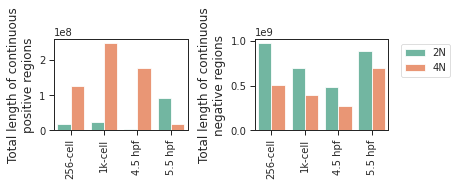

In [95]:
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    fig, axes = plt.subplots(1,2, figsize = (6.4 * 1, 4.8 * .5), tight_layout = True)
    for i,pos_neg_total in enumerate(['positive', 'negative']) :
        pos_neg = pos_neg_total[:3]
        ax = axes[i]
        df = bin_1mb_df.loc[bin_1mb_df['pos_neg'] == pos_neg]
        sns.barplot(data = df,
                    y = 'total_len_ov1Mb',
                    x = 'stage_num',
                    hue = 'N',
                    palette = 'Set2',
                    ax = ax
                    )
        
        # ax.set_title(f'Continuous {pos_neg_total} regions longer than 1Mb\n')
        # ax.set_xlim(0,20000)
        # ax.set_yscale('log')
        ax.set_xlabel('')
        ax.set_ylabel(f'Total length of continuous\n{pos_neg_total} regions')
        ax.set_xticks(ax.get_xticks())
        ax.set_xticklabels(['256-cell', '1k-cell', '4.5 hpf', '5.5 hpf'], rotation = 90)
        ax.legend(title = '')
        if i == 1 :
            h,l = ax.get_legend_handles_labels()
            ax.legend(h, ['2N', '4N'], title = '', bbox_to_anchor = [1.5, 1], loc = 'upper right')
        else :
            ax.get_legend().remove()
        fig.savefig(f'/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/20221209_WGS/figures/make3_bar_continuous_region_ov1Mb_total_length.pdf',transparent=True)
        
    

In [23]:
df

stage pos_neg   N  total_len_ov1Mb  stage_num
1    256     neg  2N        975635279          1
3     1k     neg  2N        698620000          2
5    4p5     neg  2N        481608832          3
7    5p5     neg  2N        889188832          4
9    256     neg  4N        506220000          1
11    1k     neg  4N        397318832          2
13   4p5     neg  4N        270619064          3
15   5p5     neg  4N        698558832          4

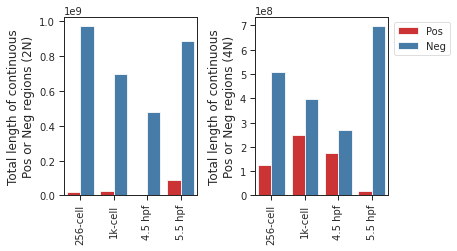

In [42]:
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    fig, axes = plt.subplots(1,2, figsize = (6.4 * 1, 4.8 * .75), tight_layout = True)
    for i,N in enumerate(['2N', '4N']) :
        # pos_neg = pos_neg_total[:3]
        ax = axes[i]
        df = bin_1mb_df.loc[bin_1mb_df['N'] == N]
        sns.barplot(data = df,
                    y = 'total_len_ov1Mb',
                    x = 'stage_num',
                    hue = 'pos_neg',
                    palette = 'Set1',
                    ax = ax
                    )
        
        # ax.set_title(f'Continuous {pos_neg_total} regions longer than 1Mb\n')
        # ax.set_xlim(0,20000)
        # ax.set_yscale('log')
        ax.set_xlabel('')
        ax.set_ylabel(f'Total length of continuous\nPos or Neg regions ({N})')
        ax.set_xticks(ax.get_xticks())
        ax.set_xticklabels(['256-cell', '1k-cell', '4.5 hpf', '5.5 hpf'], rotation = 90)
        if i == 1 :
            h,l = ax.get_legend_handles_labels()
            ax.legend(h, ['Pos', 'Neg'], title = '', bbox_to_anchor = [1.5, 1], loc = 'upper right')
        else :
            ax.get_legend().remove()
        fig.savefig(f'/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/20221209_WGS/figures/make3_bar_continuous_region_ov1Mb_total_length.pdf',transparent=True)
        
    